# CAR PRICE PREDICTION MODEL

In [1]:
import pandas as pd 
import numpy as nu
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset=pd.read_csv("/Users/harshverma/Downloads/car data.csv")
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Car_Name

In [6]:
Car=LabelEncoder()
dataset["Car_Name"]=Car.fit_transform(dataset["Car_Name"])
dataset.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,93,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


# Fuel_Type

In [7]:
Fuel=LabelEncoder()
dataset['Fuel_Type']=Fuel.fit_transform(dataset['Fuel_Type'])
dataset.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,Dealer,Manual,0
1,93,2013,4.75,9.54,43000,1,Dealer,Manual,0


# Seller_Type

In [8]:
Seller=LabelEncoder()
dataset['Seller_Type']=Seller.fit_transform(dataset['Seller_Type'])
dataset.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,Manual,0
1,93,2013,4.75,9.54,43000,1,0,Manual,0


# Transmission

In [9]:
Trans=LabelEncoder()
dataset['Transmission']=Trans.fit_transform(dataset['Transmission'])
dataset.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0


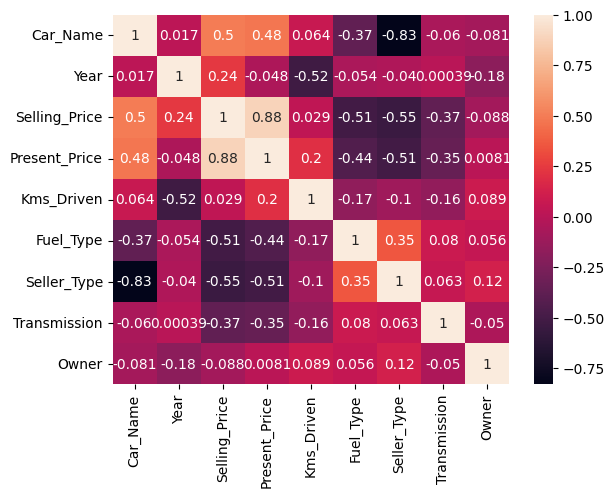

In [10]:
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

# Data Splitting

In [11]:
#input data
x=dataset[['Car_Name','Year','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
x.head(3)

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0


In [12]:
#output data
y=dataset[['Selling_Price']]
y.head(3)

,Selling_Price
0,3.35
1,4.75
2,7.25


# Input Data Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
ss=StandardScaler()
ss.fit_transform(x)
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [15]:
x.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1.074323,0.128897,-0.236215,-0.256224,0.500183,-0.737285,0.39148,-0.174501
1,1.191828,-0.217514,0.221505,0.155911,-1.852241,-0.737285,0.39148,-0.174501
2,0.212627,1.168129,0.257427,-0.773969,0.500183,-0.737285,0.39148,-0.174501
3,1.309332,-0.910335,-0.403079,-0.817758,0.500183,-0.737285,0.39148,-0.174501
4,1.152659,0.128897,-0.087890,0.141743,-1.852241,-0.737285,0.39148,-0.174501


# Train Test Data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [19]:
rf=RandomForestRegressor(n_estimators=150)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)*100,rf.score(x_test,y_test)*100

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(98.60917559327606, 96.36513921396916)

In [20]:
x_test

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
177,-1.275759,0.821718,-0.817924,-0.333500,0.500183,1.356327,-2.554408,-0.174501
289,0.251795,0.821718,0.691970,-0.668875,0.500183,-0.737285,0.391480,-0.174501
228,1.230996,-0.563924,0.205282,0.593804,-1.852241,-0.737285,0.391480,-0.174501
198,-2.059120,-0.910335,-0.817924,-0.050157,0.500183,1.356327,0.391480,3.865859
60,0.330131,-0.217514,1.272521,0.078661,0.500183,-0.737285,0.391480,-0.174501
...,...,...,...,...,...,...,...,...
234,0.760979,0.475308,-0.223468,-0.835995,0.500183,-0.737285,0.391480,-0.174501
296,0.251795,0.821718,0.460214,-0.076225,-1.852241,-0.737285,0.391480,-0.174501
281,0.251795,-2.642389,-0.003299,0.347965,0.500183,-0.737285,0.391480,-0.174501
285,0.956819,0.821718,0.100991,-0.563806,0.500183,-0.737285,-2.554408,-0.174501


In [21]:
y_test

,Selling_Price
177,0.35
289,10.11
228,4.95
198,0.15
60,6.95
...,...
234,5.50
296,9.50
281,2.10
285,7.40


# PREDICT FUNCTION FOR CAR PRICE

In [22]:
rf.predict([[0.956819,	0.821718	,0.100991	,-0.563806	,0.500183	,-0.737285	,-2.554408	,-0.174501]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6.57833333])